In [ ]:
import re
import pandas as pd
import numpy as np


Cleaning and preprocessing

In [ ]:
twitter_data= pd.read_csv('final_twitterdata_6months/AAPL.csv')
twitter_data['Datetime']=twitter_data.Datetime.map(lambda p: (str(p).split(" "))[0])
twitter_data.rename(columns = {'Datetime':'Date'}, inplace = True)
df_copy = twitter_data
df_copy

,Date,Text
0,2021-09-25,This Cannabis Stock Has A Better 1-Year Return...
1,2021-09-25,#AAPL #DIS This Cannabis Stock Has A Better 1-...
2,2021-09-25,#AAPL #HPQ U.S. Move To End Huawei Saga Helps ...
3,2021-09-25,$AAPL charting on the #iPhone13ProMax in the l...
4,2021-09-25,Remember in 2004 - When #aapl was selling for ...
...,...,...
7125,2021-03-26,$AAPL one of the most mentioned on /r/wallstre...
7126,2021-03-26,Pf+0.5% 50% cash\nBonds &amp; Treasury #VUTY +...
7127,2021-03-26,Last day of the week. Selling pressure is stil...
7128,2021-03-26,"@AroraItesh @michaelbatnick Yep, #AAPL, #TSLA,..."


In [ ]:
df_copy=df_copy.dropna()
df_copy

,Date,Text
0,2021-09-25,This Cannabis Stock Has A Better 1-Year Return...
1,2021-09-25,#AAPL #DIS This Cannabis Stock Has A Better 1-...
2,2021-09-25,#AAPL #HPQ U.S. Move To End Huawei Saga Helps ...
3,2021-09-25,$AAPL charting on the #iPhone13ProMax in the l...
4,2021-09-25,Remember in 2004 - When #aapl was selling for ...
...,...,...
7125,2021-03-26,$AAPL one of the most mentioned on /r/wallstre...
7126,2021-03-26,Pf+0.5% 50% cash\nBonds &amp; Treasury #VUTY +...
7127,2021-03-26,Last day of the week. Selling pressure is stil...
7128,2021-03-26,"@AroraItesh @michaelbatnick Yep, #AAPL, #TSLA,..."


In [ ]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')
df_copy['Date'] = df_copy['Date'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
df_copy.dropna(inplace=True)


In [ ]:
import re
df_copy['Text']=df_copy['Text'].apply(str).str.lower()

# Convert text to lowercase
    #data['review'] = data['review'].str.strip().str.lower()
    
for i in range(len(df_copy)):
    txt = df_copy.iloc[i]["Text"]
    txt=re.sub(r'@[A-Z0-9a-z_:]+','',txt)#replace username-tags
    txt=re.sub(r'^[RT]+','',txt)#replace RT-tags
    txt = re.sub('https?://[A-Za-z0-9./]+','',txt)#replace URLs
    txt=re.sub("[^a-zA-Z]", " ",txt)#replace hashtags
    df_copy.at[i,"Text"]=txt
df_copy.shape  

(7130, 2)

In [ ]:
df_copy.dropna()
df_copy.info

<bound method DataFrame.info of             Date                                               Text
0     2021-09-25  this cannabis stock has a better   year return...
1     2021-09-25   aapl  dis this cannabis stock has a better   ...
2     2021-09-25   aapl  hpq u s  move to end huawei saga helps ...
3     2021-09-25   aapl charting on the  iphone  promax in the l...
4     2021-09-25  remember in        when  aapl was selling for ...
...          ...                                                ...
6441         NaN  signals could not be any clearer on the   min ...
6456         NaN  buy the dip and enjoy every minute of it  this...
6457         NaN  current market heat map   let us know   source...
6463         NaN  pf          cash bonds  amp  treasury  vuty   ...
6464         NaN  join  robinhood with my link and we ll both ge...

[7130 rows x 2 columns]>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
type(df_copy['Text'])

pandas.core.series.Series

In [ ]:
tweets=df_copy['Text'].to_list()
#tweets

In [ ]:

# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets]
sentiment_objects
sentiment_objects[1].polarity, sentiment_objects[1]
# Create list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
#sentiment_values = [[tweet.sentiment.polarity,tweet.sentiment.subjectivity,str(tweet)] for tweet in sentiment_objects]
# Create dataframe containing the polarity value and tweet text
#sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity",'subjectivity',"tweet"])
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity","tweet"])
sentiment_df.loc[sentiment_df['polarity']==0,'sentiment']=0
sentiment_df.loc[sentiment_df['polarity']<0,'sentiment']=-1
sentiment_df.loc[sentiment_df['polarity']>0,'sentiment']=1
#new1=df_copy
df_copy['sentiment']=sentiment_df['sentiment']
df_copy['polarity']=sentiment_df['polarity']
df_copy=df_copy.dropna()
df_copy['sentiment']=df_copy['sentiment'].astype(int)


These polarity values can be plotted in a histogram, which can help to highlight in the overall sentiment (i.e. more positivity or negativity) toward the subject.

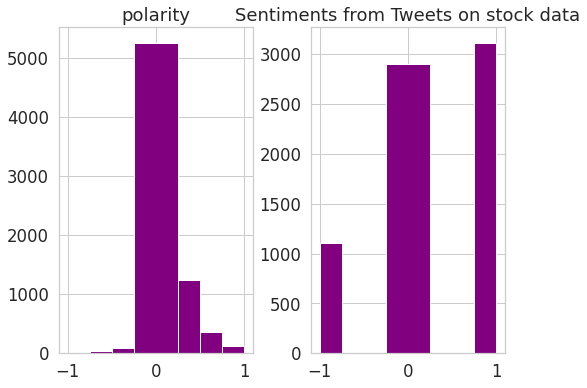

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")
plt.title("Sentiments from Tweets on stock data")
plt.show()

In [ ]:
df_copy


,Date,Text,sentiment,polarity
0,2021-09-25,this cannabis stock has a better year return...,1,0.50
1,2021-09-25,aapl dis this cannabis stock has a better ...,1,0.50
2,2021-09-25,aapl hpq u s move to end huawei saga helps ...,0,0.00
3,2021-09-25,aapl charting on the iphone promax in the l...,1,0.10
4,2021-09-25,remember in when aapl was selling for ...,0,0.00
...,...,...,...,...
7125,2021-03-26,$aapl one of the most mentioned on /r/wallstre...,1,0.40
7126,2021-03-26,pf+0.5% 50% cash\nbonds &amp; treasury #vuty +...,1,0.40
7127,2021-03-26,last day of the week. selling pressure is stil...,0,0.00
7128,2021-03-26,"@aroraitesh @michaelbatnick yep, #aapl, #tsla,...",1,0.35


In [ ]:

new=df_copy[['Date','polarity']]


In [ ]:
new

,Date,polarity
0,2021-09-25,0.50
1,2021-09-25,0.50
2,2021-09-25,0.00
3,2021-09-25,0.10
4,2021-09-25,0.00
...,...,...
7125,2021-03-26,0.40
7126,2021-03-26,0.40
7127,2021-03-26,0.00
7128,2021-03-26,0.35


In [ ]:
#add a label
new['Symbol']="Apple"
#new['Polarity']=new3['polarity']
# It is stored in the data folder.
# Write DataFrame to CSV
new.to_csv('AAPL_grouped_sentiment_double_singleday.csv', index=False)
new

,Date,polarity,Symbol
0,2021-09-25,0.50,Apple
1,2021-09-25,0.50,Apple
2,2021-09-25,0.00,Apple
3,2021-09-25,0.10,Apple
4,2021-09-25,0.00,Apple
...,...,...,...
7125,2021-03-26,0.40,Apple
7126,2021-03-26,0.40,Apple
7127,2021-03-26,0.00,Apple
7128,2021-03-26,0.35,Apple
